# Exercise Part 1: EDA and Data Cleaning
Author: J. Tyler Bittner

[Part 2: Data Visualizations](...)

## Data  Set
For this exercise the data set I'm using is [HCCI’s 2016 Health Care Cost and Utilization Report](https://www.healthcostinstitute.org/data) saved as [Machine Readable Data 2016 HCCUR.csv](datasets/HCCI’s 2016 Health Care Cost and Utilization Report - Machine readable data/Machine Readable Data 2016 HCCUR.csv).

The variables and dimentions they're measured on are described in the [HCCI data description doc](datasets/HCCI’s 2016 Health Care Cost and Utilization Report - Machine readable data/Machine Readable Data Documentation 2016 HCCUR.pdf).


# Exploratory Data Analysis & Cleanup

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set defaults
#plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv(os.path.join('datasets', 
                                    'HCCI’s 2016 Health Care Cost and Utilization Report - Machine readable data', 
                                    'Machine Readable Data 2016 HCCUR.csv'))
df.rename(columns={'HCCI_HL_CATEGORY': 'High-Level Category',
          'HCCI_ML_CATEGORY': 'Mid-Level Category',
          'HCCI_SUBCATEGORY': 'Subcategory',
          'AGE_GROUP': 'Age Group',
          'GENDER': 'Gender',
          'METRIC': 'Metric',
          'YEAR': 'Year',
          'VALUE': 'Value'},
          inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 8 columns):
High-Level Category    28140 non-null object
Mid-Level Category     28140 non-null object
Subcategory            26070 non-null object
Age Group              28140 non-null object
Gender                 28140 non-null object
Metric                 28140 non-null object
Year                   28140 non-null int64
Value                  28140 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ MB


In [3]:
df.head()

,High-Level Category,Mid-Level Category,Subcategory,Age Group,Gender,Metric,Year,Value
0,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2012,10.0975
1,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2013,12.3736
2,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2014,13.0115
3,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2015,13.4226
4,Inpatient,inpatient_acute,Labor_Delivery,All,All,OOP_spending_per_person,2016,13.9617


In [4]:
# Categorical type values (non-medical related):

print('> Age Group:')
print(df['Age Group'].unique())

print('> Gender:')
print(df['Gender'].unique())

print('> Metric:')
print(df['Metric'].unique())

print('> Year:')
print(df['Year'].unique())

> Age Group:
['All' 'Ages_0to18' 'Ages_19to25' 'Ages_26to44' 'Ages_45to54' 'Ages_55to64']
> Gender:
['All' 'Female' 'Male']
> Metric:
['OOP_spending_per_person' 'Payer_spending_per_person' 'Price'
 'Spending_per_person' 'Utilization_per_1000_persons']
> Year:
[2012 2013 2014 2015 2016]


In [5]:
# Check for nulls
print(df.shape)
print(df.isnull().sum())

(28140, 8)
High-Level Category       0
Mid-Level Category        0
Subcategory            2070
Age Group                 0
Gender                    0
Metric                    0
Year                      0
Value                     0
dtype: int64


In [6]:
# Drop nulls
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26070 entries, 0 to 27419
Data columns (total 8 columns):
High-Level Category    26070 non-null object
Mid-Level Category     26070 non-null object
Subcategory            26070 non-null object
Age Group              26070 non-null object
Gender                 26070 non-null object
Metric                 26070 non-null object
Year                   26070 non-null int64
Value                  26070 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.8+ MB


In [7]:
# Remove rows summarized by Age Group
df = df[df['Age Group'] != 'All']

# Remove rows summarized by Subcategory
df = df[df['Subcategory'] != 'Total']

# Convert  Age Group to be numeric for finding correlations later
df['Age Group Upper Limit'] = df['Age Group'].str[-2:]
df['Age Group Upper Limit'] = pd.to_numeric(df['Age Group Upper Limit'], errors='coerce')

# Ignore gender for this exercise
df.drop('Gender', axis=1, inplace=True)
df.head(10)

,High-Level Category,Mid-Level Category,Subcategory,Age Group,Metric,Year,Value,Age Group Upper Limit
50,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2012,0.5951,18
51,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2013,0.6936,18
52,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2014,0.6324,18
53,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2015,0.5548,18
54,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,OOP_spending_per_person,2016,0.4927,18
55,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2012,3.9628,18
56,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2013,4.0448,18
57,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2014,3.5116,18
58,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2015,2.9669,18
59,Inpatient,inpatient_acute,Labor_Delivery,Ages_0to18,Payer_spending_per_person,2016,2.5772,18


## Categories - Static visualization

This data set has three types of medical categories so let's take a look at the values and frequencies.

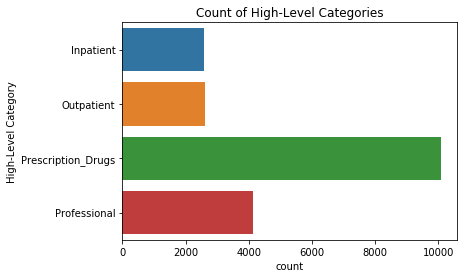

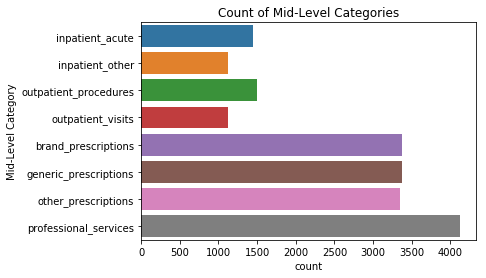

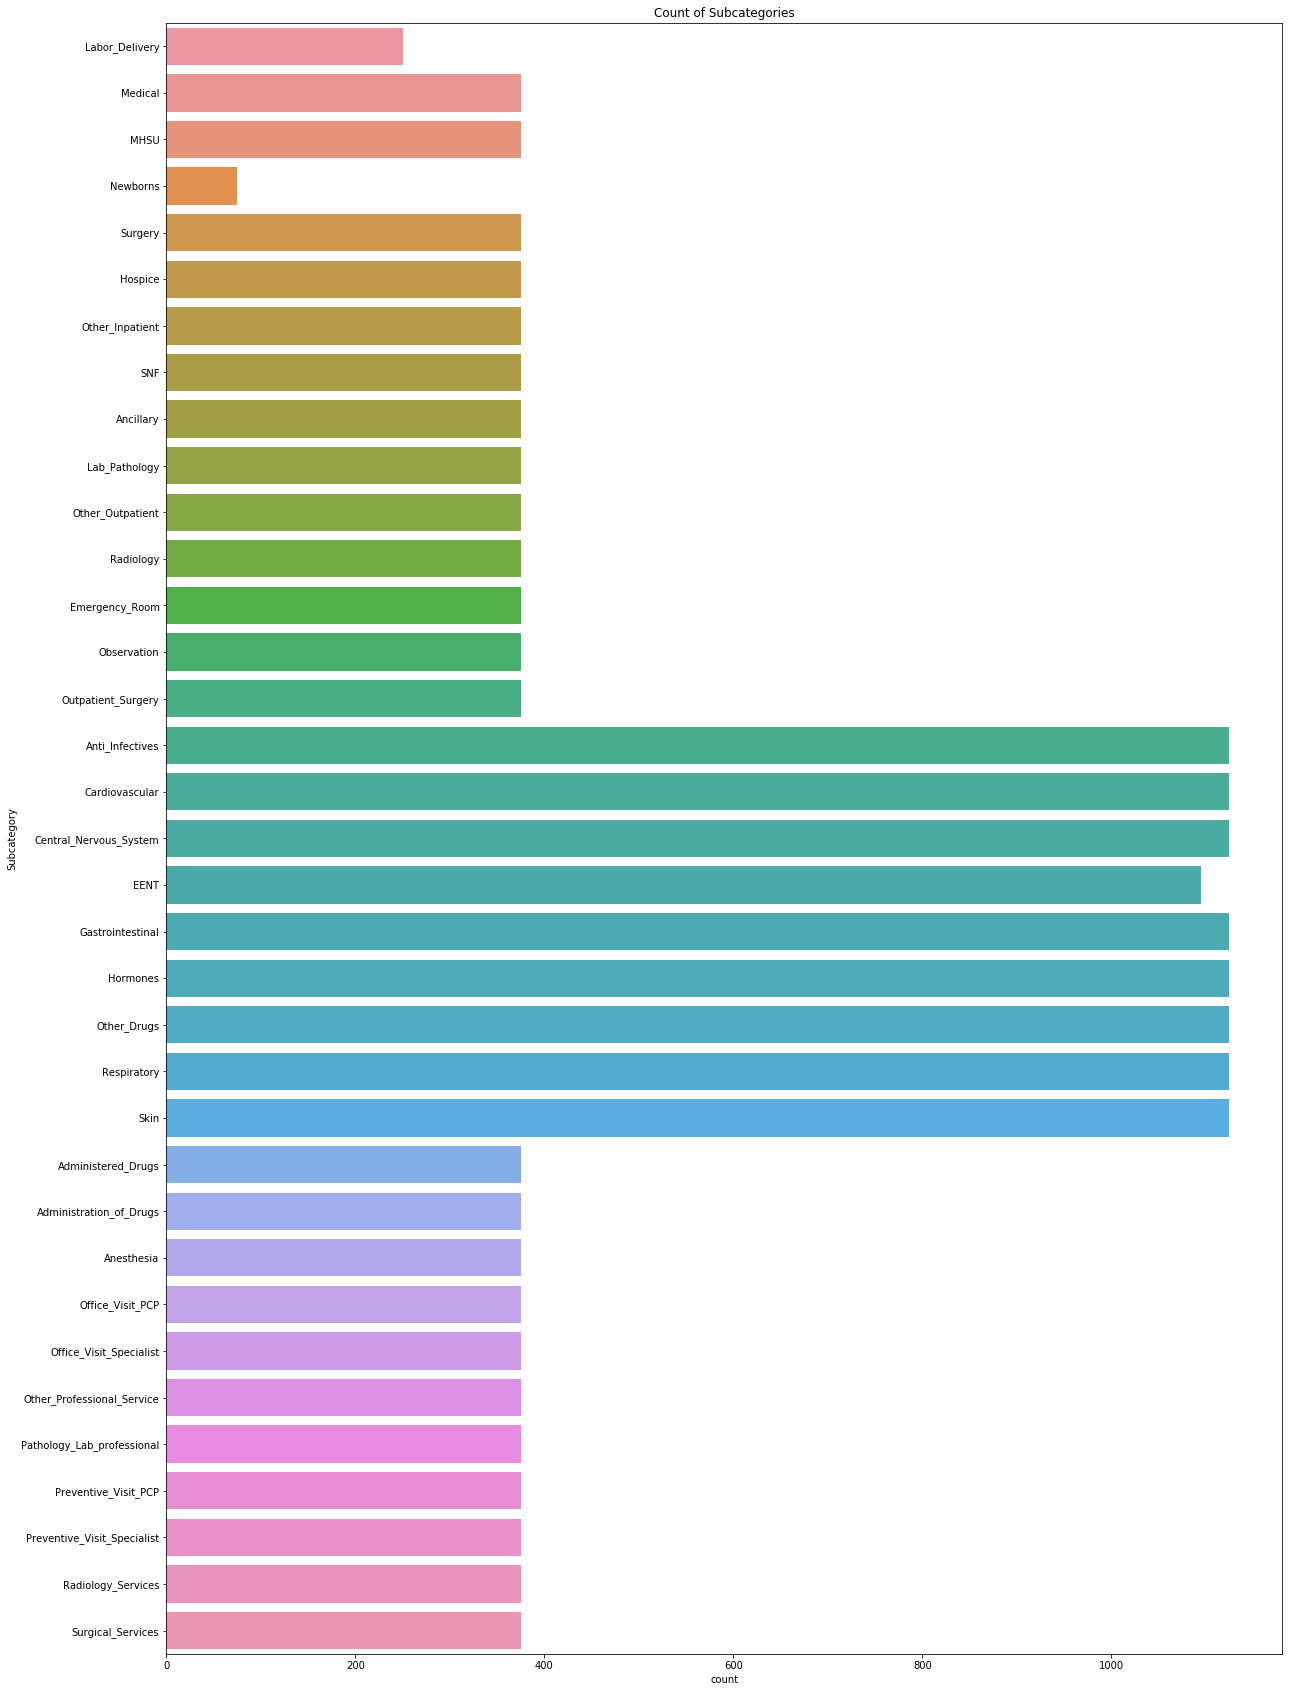

In [8]:
sns.countplot(y='High-Level Category', data=df)
plt.title('Count of High-Level Categories')
plt.show()

sns.countplot(y='Mid-Level Category', data=df)
plt.title('Count of Mid-Level Categories')
plt.show()

# Need a longer size for this one
plt.figure(figsize=(20, 30))

sns.countplot(y='Subcategory', data=df)
plt.title('Count of Subcategories')
plt.show()

In [19]:
## [In-progress] Categories Exploration (using Bokeh)
df.to_csv(os.path.join('exercise_files', 'df_categories.csv'))

## Focus on prescription drug spending and costs

Prescription drug costs are a topic of much debate and interest in the U.S. so for this exercise I'll choose to examine drug spending and prices by subcategory (ignoring brand vs. generics).

In [10]:
# Filter out irrelevant rows
rx_df = df[df['High-Level Category'] == 'Prescription_Drugs']
rx_df = rx_df.drop(['High-Level Category', 'Mid-Level Category'], axis=1)
rx_df.head()

,Subcategory,Age Group,Metric,Year,Value,Age Group Upper Limit
8625,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2012,3.8639,18
8626,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2013,4.3137,18
8627,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2014,4.4565,18
8628,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2015,4.0359,18
8629,Anti_Infectives,Ages_0to18,OOP_spending_per_person,2016,3.3667,18


## Tidy the data

The data is not in tidy form, so let's reorganize the variables and observations properly. The `Metric` column contains variables so I'll convert them into their own columns.  The `Value` column contains observations.

In [11]:
rx_df_tidy = rx_df.pivot_table(index=['Subcategory', 'Age Group Upper Limit', 'Year'],
                         columns='Metric',
                         values='Value', aggfunc=np.mean)
print(rx_df_tidy.shape)
rx_df_tidy.head(10)

(225, 5)


Metric                                      OOP_spending_per_person  \
Subcategory     Age Group Upper Limit Year                            
Anti_Infectives 18                    2012                 4.841867   
                                      2013                 4.750900   
                                      2014                 4.448389   
                                      2015                 4.527733   
                                      2016                 4.390100   
                25                    2012                 3.760978   
                                      2013                 3.697722   
                                      2014                 3.468044   
                                      2015                 3.665744   
                                      2016                 3.629444   

Metric                                      Payer_spending_per_person  \
Subcategory     Age Group Upper Limit Year                              
Anti_Infectives 18                    2012                   9.923122   
                                      2013                  10.753267   
                                      2014                  10.485811   
                                      2015                   9.593022   
                                      2016                   8.995678   
                25                    2012                  10.126200   
                                      2013                  11.264767   
                                      2014                  12.237178   
                                      2015                  13.623644   
                                      2016                  15.232278   

Metric                                          Price  Spending_per_person  \
Subcategory     Age Group Upper Limit Year                                   
Anti_Infectives 18                    2012  12.610456            14.764956   
                                      2013  14.669633            15.504144   
                                      2014  17.521444            14.934200   
                                      2015  16.142189            14.120733   
                                      2016  15.473244            13.385800   
                25                    2012  15.922078            13.887222   
                                      2013  19.408356            14.962522   
                                      2014  26.833578            15.705233   
                                      2015  25.636567            17.289356   
                                      2016  23.723222            18.861722   

Metric                                      Utilization_per_1000_persons  
Subcategory     Age Group Upper Limit Year                                
Anti_Infectives 18                    2012                   3459.720944  
                                      2013                   3254.608911  
                                      2014                   3100.666556  
                                      2015                   3105.522800  
                                      2016                   2996.774789  
                25                    2012                   3162.176233  
                                      2013                   3080.970233  
                                      2014                   2983.599222  
                                      2015                   2957.567344  
                                      2016                   2824.072611

In [12]:
# Flatten out the the MultiIndex to work nicely with plotting libs
rx_df_tidy.reset_index(inplace=True)
print(rx_df_tidy.shape)
rx_df_tidy.head()

(225, 8)


Metric,Subcategory,Age Group Upper Limit,Year,OOP_spending_per_person,Payer_spending_per_person,Price,Spending_per_person,Utilization_per_1000_persons
0,Anti_Infectives,18,2012,4.841867,9.923122,12.610456,14.764956,3459.720944
1,Anti_Infectives,18,2013,4.750900,10.753267,14.669633,15.504144,3254.608911
2,Anti_Infectives,18,2014,4.448389,10.485811,17.521444,14.934200,3100.666556
3,Anti_Infectives,18,2015,4.527733,9.593022,16.142189,14.120733,3105.522800
4,Anti_Infectives,18,2016,4.390100,8.995678,15.473244,13.385800,2996.774789


## Look for correlations

In [13]:
rx_df_tidy.corr()

Metric,Age Group Upper Limit,Year,OOP_spending_per_person,Payer_spending_per_person,Price,Spending_per_person,Utilization_per_1000_persons
Metric,,,,,,,
Age Group Upper Limit,1.000000,0.000000,0.522301,0.503733,0.113305,0.529634,0.483740
Year,0.000000,1.000000,-0.057604,0.107881,0.170600,0.082755,0.004156
OOP_spending_per_person,0.522301,-0.057604,1.000000,0.707380,0.012466,0.791997,0.963403
Payer_spending_per_person,0.503733,0.107881,0.707380,1.000000,0.193111,0.991782,0.624053
Price,0.113305,0.170600,0.012466,0.193111,1.000000,0.169055,-0.059679
Spending_per_person,0.529634,0.082755,0.791997,0.991782,0.169055,1.000000,0.713400
Utilization_per_1000_persons,0.483740,0.004156,0.963403,0.624053,-0.059679,0.713400,1.000000


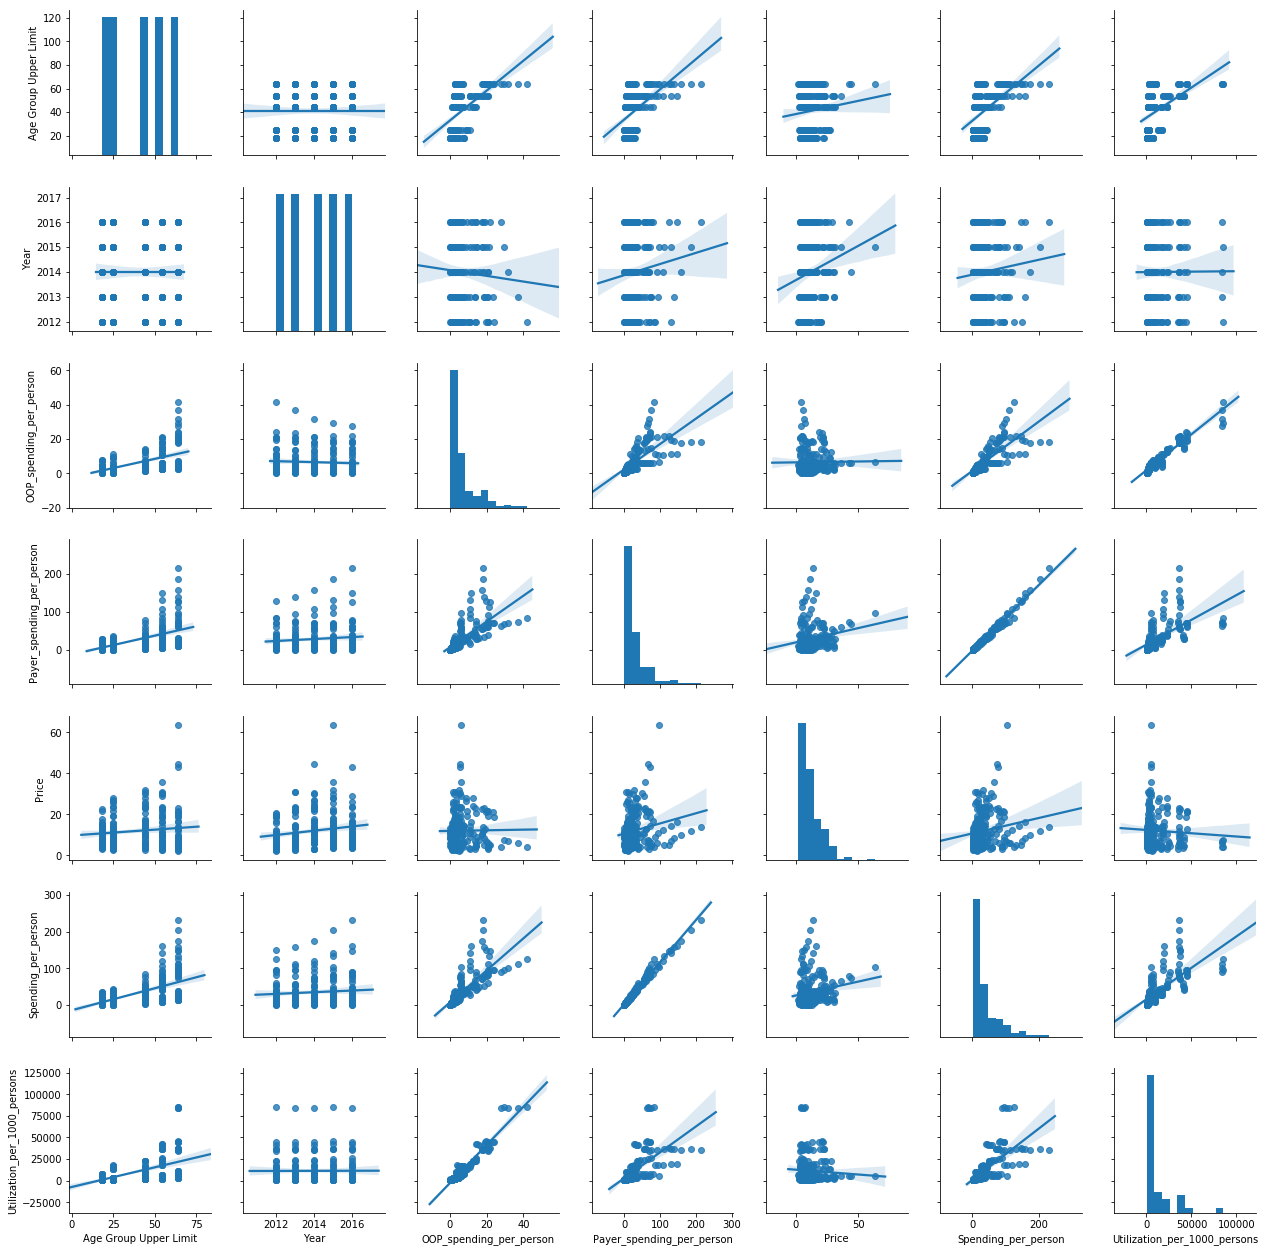

In [14]:
sns.pairplot(rx_df_tidy, kind="reg")
plt.show()

### Correlation findings

As confirmed in the correlations, 'Spending_per_person' is the sum of 'OOP_spending_per_person' and 'Payer_spending_per_person', so let's remove them.

The relevant metrics I'll pay attention to,  are:
- 'Spending_per_person' (the total of 'OOP_spending_per_person' and 'Payer_spending_per_person')
- 'Price'

In [15]:
# Drop redundant columns
rx_df_tidy.drop(labels=['OOP_spending_per_person', 'Payer_spending_per_person'], axis=1, inplace=True)
rx_df_tidy.head()

Metric,Subcategory,Age Group Upper Limit,Year,Price,Spending_per_person,Utilization_per_1000_persons
0,Anti_Infectives,18,2012,12.610456,14.764956,3459.720944
1,Anti_Infectives,18,2013,14.669633,15.504144,3254.608911
2,Anti_Infectives,18,2014,17.521444,14.934200,3100.666556
3,Anti_Infectives,18,2015,16.142189,14.120733,3105.522800
4,Anti_Infectives,18,2016,15.473244,13.385800,2996.774789


## Finalize cleanup

In [18]:
# Rename cols to be more friendly
rx_df_tidy.rename(columns={
                  'Spending_per_person': 'Spending per person',
                  'Utilization_per_1000_persons': 'Utilization per 1000 persons',
                  'Price': 'Price per filled day'
                  },
                 inplace=True)
rx_df_tidy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
Subcategory                     225 non-null object
Age Group Upper Limit           225 non-null int64
Year                            225 non-null int64
Price per filled day            225 non-null float64
Spending per person             225 non-null float64
Utilization per 1000 persons    225 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 10.6+ KB


In [17]:
# Save to file for use in Part 2
rx_df_tidy.to_csv(os.path.join('exercise_files', 'rx_df_tidy.csv'))

# Summary
Now that our data set is clean and tidy we can move on to creating visualizations in [Part 2](Exercise%20Part%202%20-%20Data%20Visualizations.ipynb).